In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/augmented_data_v5.csv') #working with the augmented data set 

In [3]:
df.head()

,t1_general_traditional_WIN%,t1_general_traditional_PTS,t1_general_traditional_FGM,t1_general_traditional_FG%,t1_general_traditional_3PM,t1_general_traditional_3P%,t1_general_traditional_FTM,t1_general_traditional_FT%,t1_general_traditional_OREB,t1_general_traditional_DREB,...,t2_clutch-opponent_Opponent's Assists,t2_clutch-opponent_Opponent's Turnovers,t2_clutch-opponent_Opponent's Steals,t2_clutch-opponent_Opponent's Blocks,t2_clutch-opponent_Opponent's Blocked Field Goal Attempts,t2_clutch-opponent_Opponent's Personal Fouls,t2_clutch-opponent_Opponent's Personal Fouls Drawn,t2_clutch-opponent_Opponent's Points,t2_seed,outcome
0,56.136961,91.936961,34.136961,43.136961,4.136961,34.636961,19.536961,74.536961,12.636961,31.836961,...,1.236961,1.236961,0.636961,0.536961,0.336961,2.736961,2.136961,7.436961,3.036961,1.0
1,56.067745,91.867745,34.067745,43.067745,4.067745,34.567745,19.467745,74.467745,12.567745,31.767745,...,1.167745,1.167745,0.567745,0.467745,0.267745,2.667745,2.067745,7.367745,2.967745,1.0
2,55.901007,91.701007,33.901007,42.901007,3.901007,34.401007,19.301007,74.301007,12.401007,31.601007,...,1.001007,1.001007,0.401007,0.301007,0.101007,2.501007,1.901007,7.201007,2.801007,1.0
3,63.749637,101.049637,38.349637,46.149637,7.249637,38.249637,18.349637,79.049637,12.249637,30.849637,...,1.949637,1.549637,0.949637,0.749637,0.849637,2.849637,3.449637,9.149637,7.349637,1.0
4,63.668883,100.968883,38.268883,46.068883,7.168883,38.168883,18.268883,78.968883,12.168883,30.768883,...,1.868883,1.468883,0.868883,0.668883,0.768883,2.768883,3.368883,9.068883,7.268883,1.0


In [4]:
X = df.drop(columns=['outcome']).to_numpy()
y = df['outcome'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [5]:
def accuracy(y1, y2):
    cor = 0
    for i in range(y1.shape[0]):
        if y1[i] == y2[i]:
            cor+=1
    return cor/y1.shape[0]

In [10]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
ypreds = rfc.predict(x_test)
accuracy(ypreds,y_test)

0.6118421052631579

In [ ]:
#61% accuracy for the default random forest classifier

In [11]:
#let's average performance of the default random classifier over 25 runs; there is inherent randomness in the
#classifier since the trees in the random forest randomly sample the training set with replacement 

In [14]:
acc_list = []
for i in range(25):
    rfc.fit(x_train,y_train)
    ypreds = rfc.predict(x_test)
    acc = accuracy(ypreds,y_test)
    acc_list.append(acc)
print(sum(acc_list)/len(acc_list))

0.5996491228070172


In [ ]:
#default random forest classifier achieves about 60% accuracy on test set of augmented data

In [ ]:
#let's work with normal data ie: not augmented

In [18]:
df = pd.read_csv('data/data_v5.csv')

In [19]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Year,t1_general_traditional_WIN%,t1_general_traditional_PTS,t1_general_traditional_FGM,t1_general_traditional_FG%,t1_general_traditional_3PM,t1_general_traditional_3P%,t1_general_traditional_FTM,...,t2_clutch-opponent_Opponent's Steals,t2_clutch-opponent_Opponent's Blocks,t2_clutch-opponent_Opponent's Blocked Field Goal Attempts,t2_clutch-opponent_Opponent's Personal Fouls,t2_clutch-opponent_Opponent's Personal Fouls Drawn,t2_clutch-opponent_Opponent's Points,t2_TEAM,t2_seed,t2_series_wins,outcome
0,0,0,2001,56.1,91.9,34.1,43.1,4.1,34.6,19.5,...,0.6,0.5,0.3,2.7,2.1,7.4,Miami Heat,3,0,1
1,1,1,2001,63.4,100.7,38.0,45.8,6.9,37.9,18.0,...,0.6,0.4,0.5,2.5,3.1,8.8,Orlando Magic,7,1,1
2,2,2,2001,50.0,92.6,34.5,44.0,4.8,34.2,18.8,...,0.6,0.5,0.6,3.3,2.5,8.2,Philadelphia 76ers,1,3,0
3,3,3,2001,58.5,88.7,33.6,44.4,4.8,35.1,16.8,...,0.5,0.4,0.4,2.2,2.6,7.6,Toronto Raptors,5,3,0
4,4,4,2001,64.6,100.5,37.6,45.9,6.3,38.1,18.9,...,0.5,0.2,0.3,2.9,2.2,6.9,Utah Jazz,4,2,1


In [20]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0','Year', 't1_TEAM','t2_TEAM','t1_series_wins','t2_series_wins'],inplace=True)
X = df.drop(columns=['outcome']).to_numpy()
y = df['outcome'].to_numpy()


In [21]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
acc_list = []
for i in range(25):
    rfc.fit(x_train,y_train)
    ypreds = rfc.predict(x_test)
    acc = accuracy(ypreds,y_test)
    acc_list.append(acc)
print(sum(acc_list)/len(acc_list))

0.7752000000000001


In [22]:
#averaged 77-78% when using normal dataset!

In [27]:
def f(num_trees,depth=None):
    acc_list = []
    rfc = RandomForestClassifier(n_estimators=num_trees,max_depth=depth)
    for i in range(3):
        rfc.fit(x_train,y_train)
        ypreds = rfc.predict(x_test)
        acc = accuracy(ypreds,y_test)
        acc_list.append(acc)
    return sum(acc_list)/len(acc_list)

In [28]:
#let's play around with some of the hyperparameters of the random forest classifier like number of trees and max depth

min_trees = 50
max_trees = 150
min_maxdepth = 10
max_maxdepth = 25
#also try no specification on max depth

d = {}

for trees in range(min_trees,max_trees+1):
    for dep in range(min_maxdepth, max_maxdepth+1):
        print(trees,dep,sep=', ')
        avg_acc = f(trees,dep)
        d[(trees,dep)]=avg_acc
    avg_acc = f(trees)
    d[(trees,None)]=avg_acc

for k, v in d.items():
    print(k,v,sep=': ')



50, 10
50, 11
50, 12
50, 13
50, 14
50, 15
50, 16
50, 17
50, 18
50, 19
50, 20
50, 21
50, 22
50, 23
50, 24
50, 25
51, 10
51, 11
51, 12
51, 13
51, 14
51, 15
51, 16
51, 17
51, 18
51, 19
51, 20
51, 21
51, 22
51, 23
51, 24
51, 25
52, 10
52, 11
52, 12
52, 13
52, 14
52, 15
52, 16
52, 17
52, 18
52, 19
52, 20
52, 21
52, 22
52, 23
52, 24
52, 25
53, 10
53, 11
53, 12
53, 13
53, 14
53, 15
53, 16
53, 17
53, 18
53, 19
53, 20
53, 21
53, 22
53, 23
53, 24
53, 25
54, 10
54, 11
54, 12
54, 13
54, 14
54, 15
54, 16
54, 17
54, 18
54, 19
54, 20
54, 21
54, 22
54, 23
54, 24
54, 25
55, 10
55, 11
55, 12
55, 13
55, 14
55, 15
55, 16
55, 17
55, 18
55, 19
55, 20
55, 21
55, 22
55, 23
55, 24
55, 25
56, 10
56, 11
56, 12
56, 13
56, 14
56, 15
56, 16
56, 17
56, 18
56, 19
56, 20
56, 21
56, 22
56, 23
56, 24
56, 25
57, 10
57, 11
57, 12
57, 13
57, 14
57, 15
57, 16
57, 17
57, 18
57, 19
57, 20
57, 21
57, 22
57, 23
57, 24
57, 25
58, 10
58, 11
58, 12
58, 13
58, 14
58, 15
58, 16
58, 17
58, 18
58, 19
58, 20
58, 21
58, 22
58, 23
58, 24

120, 15
120, 16
120, 17
120, 18
120, 19
120, 20
120, 21
120, 22
120, 23
120, 24
120, 25
121, 10
121, 11
121, 12
121, 13
121, 14
121, 15
121, 16
121, 17
121, 18
121, 19
121, 20
121, 21
121, 22
121, 23
121, 24
121, 25
122, 10
122, 11
122, 12
122, 13
122, 14
122, 15
122, 16
122, 17
122, 18
122, 19
122, 20
122, 21
122, 22
122, 23
122, 24
122, 25
123, 10
123, 11
123, 12
123, 13
123, 14
123, 15
123, 16
123, 17
123, 18
123, 19
123, 20
123, 21
123, 22
123, 23
123, 24
123, 25
124, 10
124, 11
124, 12
124, 13
124, 14
124, 15
124, 16
124, 17
124, 18
124, 19
124, 20
124, 21
124, 22
124, 23
124, 24
124, 25
125, 10
125, 11
125, 12
125, 13
125, 14
125, 15
125, 16
125, 17
125, 18
125, 19
125, 20
125, 21
125, 22
125, 23
125, 24
125, 25
126, 10
126, 11
126, 12
126, 13
126, 14
126, 15
126, 16
126, 17
126, 18
126, 19
126, 20
126, 21
126, 22
126, 23
126, 24
126, 25
127, 10
127, 11
127, 12
127, 13
127, 14
127, 15
127, 16
127, 17
127, 18
127, 19
127, 20
127, 21
127, 22
127, 23
127, 24
127, 25
128, 10
128, 11


In [29]:
num_trees_effect = []
for trees in range(min_trees,max_trees+1):
    num_trees_effect.append(d[(trees,None)])

y_ax = np.array(num_trees_effect).reshape(-1)
x_ax = np.arange(min_trees,max_trees+1)

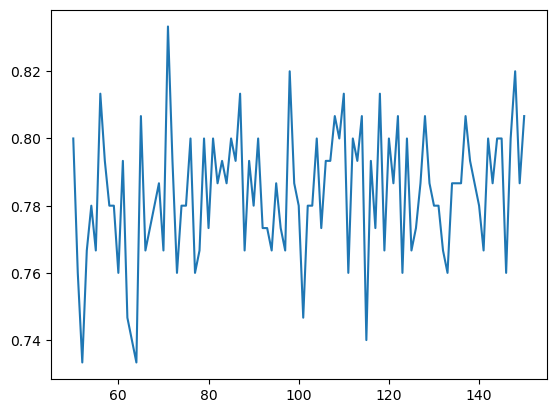

In [30]:
from matplotlib import pyplot as plt
plt.plot(x_ax,y_ax)

In [31]:
# unexpectedly, number of trees impact on performance is pretty noisy

In [32]:
#for ntrees = 100, let's see how max depth impacts performance

depth_effect = []
for dep in range(min_maxdepth, max_maxdepth+1):
    depth_effect.append(d[(100,dep)])
x_ax = np.arange(min_maxdepth,max_maxdepth+1)
y_ax = np.array(depth_effect).reshape(-1)

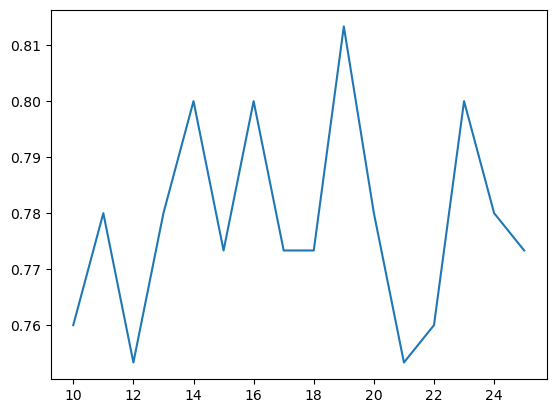

In [33]:
plt.plot(x_ax,y_ax)

In [2]:
#let's work with v6 (top 25 features by MI score)
df = pd.read_csv('data/data_v6_k25.csv')

In [3]:
df.head()

,Unnamed: 0,t1_general_traditional_WIN%,t1_general_traditional_+/-,t1_general_advanced_NetRtg,t1_general_advanced_eFG%,t1_general_advanced_PIE,t1_clutch-traditional_Win Percentage,t1_clutch-traditional_Points,t1_clutch-opponent_Opponent's Field Goal Percentage,t1_clutch-opponent_Opponent's Offensive Rebounds,...,t2_general_advanced_POSS,t2_clutch-traditional_Win Percentage,t2_clutch-traditional_Free Throw Percentage,t2_clutch-traditional_Defensive Rebounds,t2_clutch-advanced_Net Rating,t2_clutch-advanced_Offensive Rebounding Percentage,t2_clutch-opponent_Opponent's Turnovers,t2_seed,t2_series_wins,outcome
0,0,56.1,2.1,2.1,45.7,52.7,48.9,7.6,41.8,0.8,...,7331.0,62.3,74.5,2.6,6.0,30.0,1.2,3,0,1
1,1,63.4,3.9,4.2,49.9,51.9,61.2,7.6,40.2,1.0,...,7828.0,49.0,73.4,2.5,-8.7,30.8,1.2,7,1,1
2,2,50.0,-0.2,-0.2,47.1,51.0,54.3,9.0,37.2,1.1,...,7619.0,65.0,74.7,2.8,8.2,33.7,1.1,1,3,0
3,3,58.5,2.6,3.0,47.6,52.0,57.5,7.7,31.1,1.2,...,7671.0,52.3,78.9,3.0,4.9,34.2,1.0,5,3,0
4,4,64.6,4.3,4.4,49.8,52.3,54.3,8.3,40.3,1.3,...,7503.0,62.2,79.8,2.3,21.2,42.3,0.7,4,2,1


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)
X = df.drop(columns=['outcome']).to_numpy()
y = df['outcome']


In [20]:
from sklearn.model_selection import train_test_split

rfc = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
acc_list = []
for i in range(25):
    rfc.fit(x_train,y_train)
    ypreds = rfc.predict(x_test)
    acc = accuracy(ypreds,y_test.to_numpy())
    acc_list.append(acc)
print(sum(acc_list)/len(acc_list))

0.9945454545454545


In [21]:
acc_list 

[1.0,
 0.9848484848484849,
 0.9848484848484849,
 1.0,
 0.9848484848484849,
 1.0,
 0.9848484848484849,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9848484848484849,
 0.9848484848484849,
 1.0,
 1.0,
 1.0,
 0.9848484848484849,
 0.9848484848484849,
 0.9848484848484849,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [24]:
#achieved close to 100% accuracy! but there is positive bias 
#since selected features were chosen prior to splitting dsta based on MI
